# Notebook n.3 
### NYC complaints 311 Calls

In this notebook you are asked to perform data analysis on a dataset of calls to 311 (municipal calls, not emergency) in the New York City area.

Get the data:
   * A compressed smaller version (~100 MB compressed) can be found [here](https://bit.ly/3b7yATT)
   * If you want (and have enough memory on your laptop), you can download the original data from [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (11Gb+... Go to Export -> CSV).

## Instructions:
   * The small dataset is enough to finish this notebook.
   * For each question, add as many code cells as you need, as well as Markdown cells to explain your thought process and answer in text to the questions (where needed).

In [64]:
# Run this cell to import commonly used modules
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)  # large and nice

### <a id="point1">1.</a> Load the `csv` file into a `pandas.dataframe` called `complaints`

In [65]:
complaints = pd.read_csv('311_small.csv')
type(complaints)

/Users/ufukcembirbiri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


pandas.core.frame.DataFrame

### 2. Basic overview

   * How many rows?
   * How many columns?
   * Type of each column
   * Number of unique values per column
   * Show the first 5 rows
   * [Earlier](#point1) you probably received a warning. If so, why? Investigate (type mismatch, nans, ...)

In [66]:
print("number of rows:",len(complaints.index))
print("number of columns:", len(complaints.columns))


number of rows: 999999
number of columns: 41


In [67]:
print("type of columns:")
print(complaints.dtypes)

type of columns:
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board  

In [68]:
#Number of unique values per column:
complaints.nunique()

Unique Key                        999999
Created Date                      776536
Closed Date                       400907
Agency                                29
Agency Name                          503
Complaint Type                       253
Descriptor                          1194
Location Type                        147
Incident Zip                         748
Incident Address                  301977
Street Name                        13127
Cross Street 1                     14936
Cross Street 2                     15088
Intersection Street 1               9567
Intersection Street 2              10199
Address Type                           6
City                                 324
Landmark                            2597
Facility Type                          4
Status                                 9
Due Date                          376211
Resolution Description               903
Resolution Action Updated Date    399139
Community Board                       77
BBL             

In [69]:
#Show the first 5 rows
complaints.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


In [70]:
#Earlier you probably received a warning.If so,why? Investigate(type mismatch,nans,..):
#
#The error is:
#DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types.Specify dtype 
#option on import or set low_memory=False.
#
#As my research about the error,it basically means the columns(8,31,32,34,35,36,37)
#consists out of multiple dtypes. The dtypes are not same for different rows in these columns. 
#Also, this error may occur if there are NaNs.
#There are possibly 4 solutions for this error:
#
#
#Solution-1:
#We can replace NaNs with zeros:
#complaints.fillna(0)
#However,I don't think this solves the problem entirely beacuse think about a situation when a column has 
#strings and NaNs only. If we replace NaNs with 0, then the dtype becomes int (or float). So the dtypes would be
#still different.
#
#
#Solution-2:
#Set the low_memory argument of read_csv to False. So in above,while reading the csv file, I should do something like:
#complaints = pd.read_csv('311_small.csv', low_memory=False)
#However, this method doesn’t fix the error, it just silences it.
#
#
#Solution-3:
#I can specify the dtype of the confusing columns manually.So while reading the csv file, I can do something like:
#pd.read_csv('311_small.csv', dtype={'eight_column': 'str', 'thirty_one_column': 'str',...})
#
#
#Solution-4:
#Using converters could solve the problem instead of doing it manually.I can specify how to convert the values 
#that are read from the CSV file.

def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

#pd.read_csv('311_small.csv',converters={'eight_column': convert_dtype,'thirty_one_column': convert_dtype,...})
#

In [71]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


### 3. Show the top 10 rows for attributes `Complaint Type` and `Borough`

In [72]:
#Show the top 10 rows for attributes Complaint Type and Borough
print(complaints.columns)
print(complaints["Complaint Type"].head(10))
print("\n")
print(complaints["Borough"].head(10))

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
0                   HEAT/HOT WATER
1           HPD Literature Request
2                          Smoking
3               Sidewalk Condition
4        

### 4. How many distinct `Complaint Type` are there?
   * Count them and show them

In [73]:
#How many distinct Complaint Type are there? Count them and show them
print("number of distinct Complaints Types:",complaints["Complaint Type"].nunique())
print("\n")
print("distinct Complaints Types:")
print(complaints["Complaint Type"].unique())

number of distinct Complaints Types: 253


distinct Complaints Types:
['HEAT/HOT WATER' 'HPD Literature Request' 'Smoking' 'Sidewalk Condition'
 'Damaged Tree' 'Street Condition' 'Street Light Condition'
 'General Construction/Plumbing' 'Plumbing' 'Curb Condition'
 'Animal Abuse' 'Non-Residential Heat' 'Electronics Waste'
 'Traffic Signal Condition' 'Water System' 'APPLIANCE' 'DOOR/WINDOW'
 'Food Poisoning' 'Street Sign - Damaged' 'Noise - Vehicle'
 'Street Sign - Missing' 'Food Establishment' 'Electrical' 'ELECTRIC'
 'New Tree Request' 'Noise' 'FLOORING/STAIRS' 'GENERAL'
 'Root/Sewer/Sidewalk Condition' 'Dead/Dying Tree'
 'DOF Property - Reduction Issue' 'DOF Property - Payment Issue' 'Traffic'
 'Graffiti' 'DOF Parking - Request Copy' 'SAFETY'
 'DOF Parking - Payment Issue' 'Illegal Parking'
 'DOF Parking - Request Status' 'Broken Muni Meter' 'Taxi Complaint'
 'Noise - Residential' 'Blocked Driveway' 'Snow' 'Dirty Conditions'
 'Sweeping/Inadequate' 'Noise - Commercial' 'Indoor Sewage'

### <a id="point5">5.</a> Clean `all` lines where `Complaint Type` contains the keyword `"Misc."` 
   * How many lines are dropped?

In [74]:
#Clean all lines where Complaint Type contains the keyword "Misc.":
#
#First, divide the data frame two where df_consists has the keyword "Misc.",
#and df_not_consists does not have the the keyword "Misc.".
df_consists= complaints[complaints["Complaint Type"].str.contains('Misc.')]
df_not_consists= complaints[~complaints["Complaint Type"].str.contains('Misc.')]
#
#
#Now, print how many rows the original dataframe has:
print("number of total rows:",len(complaints.index))
#
#How many rows 'df_consists' has:
print(len(df_consists.index))
#
#How many rows 'df_not_consists' has:
print(len(df_not_consists.index))
#
#Check the evaluation:
print(len(df_not_consists.index)+len(df_consists.index)==len(complaints.index))
#
#How many lines are dropped?
print("How many lines are dropped? ",len(df_consists.index))
#
#Clean all lines where Complaint Type contains the keyword "Misc.":
complaints_new= df_not_consists
print(len(complaints_new.index))

number of total rows: 999999
19
999980
True
How many lines are dropped?  19
999980


#### From now on, use the dataframe resulting from point [5](#point5)

### <a id="point6">6.</a> Count the number of `Complaint Type`
   * Show the top 10 most popular complaint types.
   * Plot the histogram of the 10 most popular complaint types.

In [75]:
#Show the top 10 most popular complaint types:
complaints_new.groupby("Complaint Type").size().sort_values(ascending=False).head(10)


Complaint Type
HEAT/HOT WATER                         124358
Noise - Residential                     83272
General Construction/Plumbing           57295
Illegal Parking                         56634
Request Large Bulky Item Collection     54515
Blocked Driveway                        51171
Street Condition                        47301
Water System                            28549
Street Light Condition                  26744
UNSANITARY CONDITION                    25171
dtype: int64

[124358, 83272, 57295, 56634, 54515, 51171, 47301, 28549, 26744, 25171]
['HEAT/HOT WATER', 'Noise - Residential', 'General Construction/Plumbing', 'Illegal Parking', 'Request Large Bulky Item Collection', 'Blocked Driveway', 'Street Condition', 'Water System', 'Street Light Condition', 'UNSANITARY CONDITION']


<AxesSubplot:>

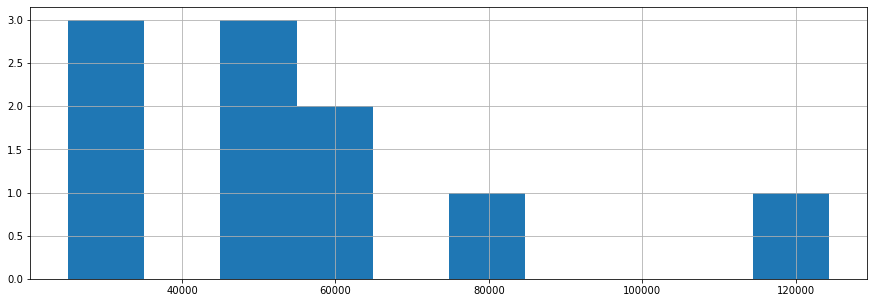

In [76]:
#Plot the histogram of the 10 most popular complaint types:
most_popular10=complaints_new.groupby("Complaint Type").size().sort_values(ascending=False).head(10)
counts=[]
complaint_types=[]
for i in range(0,10):
    counts.append(most_popular10[i])
    complaint_types.append(most_popular10.index[i])

print(counts)
print(complaint_types)
#
#Here is the histogram:
most_popular10.hist(bins=10)
#
#
#
#However,I think bar plot is a better for visualization because x axis=complaint_types
#and y axis= counts. We can observe the counts and corresponding complaint types better.
#Here is the bar plot:
#Need to un-comment it!
#print(most_popular10.plot.bar())



### 7. Extract all the rows with the Top 1 Complaint Type into a new dataframe
   * Top 1 Complaint Type is the single most popular Complaint Type found in [the previous question](#point6) (from now on `Top1`)
   * Show the top 3 rows of the new dataframe
   * What is the relation between the Top1 Complaint Type and different boroughs?
      * Leave out eventual unspecified data
      * Find the data distribution (i.e., count them)
      * Plot the histogram of the ratio of Top1 over all complaints, per borough.

HEAT/HOT WATER
    Unique Key            Created Date             Closed Date Agency  \
0     38039130  12/28/2017 02:07:27 AM  01/25/2018 04:14:40 PM    HPD   
67    38039226  12/28/2017 06:34:15 AM  12/28/2017 09:26:20 PM    HPD   
77    38039238  12/28/2017 12:58:15 AM  12/28/2017 02:08:17 AM    HPD   

                                          Agency Name  Complaint Type  \
0   Department of Housing Preservation and Develop...  HEAT/HOT WATER   
67  Department of Housing Preservation and Develop...  HEAT/HOT WATER   
77  Department of Housing Preservation and Develop...  HEAT/HOT WATER   

        Descriptor         Location Type Incident Zip     Incident Address  \
0   APARTMENT ONLY  RESIDENTIAL BUILDING        11226  2709 CLARENDON ROAD   
67  APARTMENT ONLY  RESIDENTIAL BUILDING        11233  1924 PROSPECT PLACE   
77  APARTMENT ONLY  RESIDENTIAL BUILDING        10472  1030 BOYNTON AVENUE   

    ... Vehicle Type Taxi Company Borough Taxi Pick Up Location  \
0   ...          Na

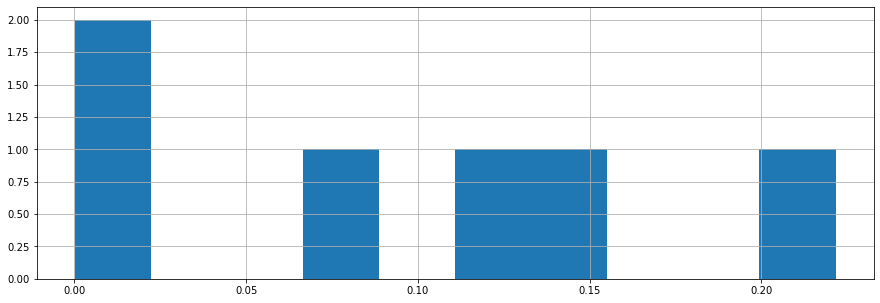

In [77]:
#Extract all the rows with the Top 1 Complaint Type into a new dataframe:
#
#I take the top1 complaint type and created a new dataframe called complaints_new_top1:
top1=complaints_new.groupby("Complaint Type").size().sort_values(ascending=False).head(1)
print(top1.index[0] )
top1_complaint_type=complaints_new["Complaint Type"]==top1.index[0]
#top1_complaint_type is a True-False matrix
#
complaints_top1=complaints_new[top1_complaint_type]
#
#Leave out eventual unspecified data:
complaints_rest=complaints_new[~top1_complaint_type]
#
#
#Note1: 'complaints_new' dataframe contains all kind of Complaint Types.
#Note2: 'complaints_top1' dataframe contains only top1 complaint type(HEAT/HOT WATER)
#Note3: 'complaints_rest' dataframe contains all kind of complaint types except top1.
#
#Show the top 3 rows of the new dataframe:
print(complaints_top1.head(3))
#
#Find the data distribution (i.e., count them):
print("number of row counts in complaints_top1 =",len(complaints_top1.index))
print("number of row counts complaints_rest =",len(complaints_rest.index))
#
#Plot the histogram of the ratio of Top1 over all complaints, per borough:
#
#Ratio is (the number of rows in each Borough group in complaints_top1 df)/(the number of rows in each Borough group in complaints_new df)
#
ratio=complaints_top1.groupby("Borough").size()/complaints_new.groupby("Borough").size()
print(ratio)
print(ratio.hist())
#
#
#
##
#Again,I think bar plot is a better for visualization because x axis=Borough types
#and y axis= ratio. We can observe the ratio and corresponding borough types better.
#Here is the bar plot:
#Need to un-comment it!
#print(ratio.plot.bar())
